# Introduction

There have been [articles](https://fivethirtyeight.com/features/fandango-movies-ratings/) claiming that Fandango's rating system was biased and dishonest, and we want to determine whether Fandango's rating system has changed since the article has been published. Therefore, we will be comparing fandango's rating in 2015 and 2016. Our analysis is based on the assumption that the TRUE movie ratings are very similar every year, that is, movies in 2015 are about as good as movies in 2016.

Data in 2016 can be downloaded here: https://github.com/mircealex/Movie_ratings_2016_17

# Read in the data

In [1]:
import pandas as pd
fandango_score = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_score = fandango_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [3]:
fandango_score.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
movie_ratings=movie_ratings[['movie', 'year', 'fandango']]

In [5]:
movie_ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [6]:
sum(fandango_score['Fandango_votes']<30)

0

In [7]:
fandango_2015 = fandango_score[fandango_score['FILM'].str[-5:-1]=='2015'].copy()

In [8]:
fandango_2015.sample(5,random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
138,Spare Parts (2015),4.5,4.5,450,0.0
120,The Wolfpack (2015),3.5,3.4,66,0.1
63,Child 44 (2015),4.0,3.7,308,0.3
64,Dark Places (2015),4.0,3.7,55,0.3
40,I'll See You In My Dreams (2015),4.0,3.6,281,0.4


In [9]:
fandango_2016 = movie_ratings[movie_ratings['year']==2016]

In [10]:
fandango_2016.sample(5,random_state=1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5


# Comparing Distributions of 2015 and 2016 ratings

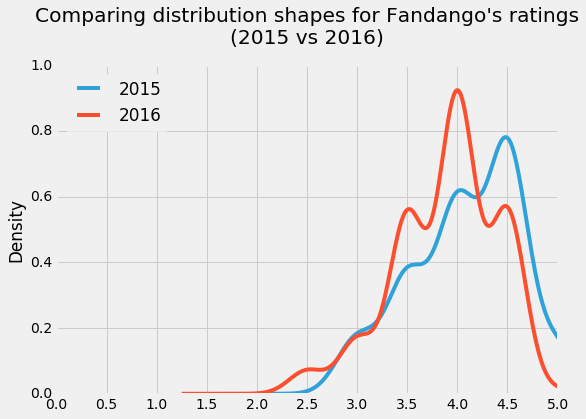

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label='2016',legend=True)
plt.xlabel='stars'
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",y=1.05)
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Judging from the plot, we can see that the ratings in 2015 are clearly biased toward higher stars (4, 4.5), where as in 2016, there is clearly a mean of around 4.0 and the distribution is more symmetric.

In [12]:
# percentage
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Using a percentage representation, we can clearly see that the highest percentage rating went from 4.5 to 4 from 2015 to 2016. Which means that very high ratings (4.5 and 5) are much harder to earn in 2016.

## Side by Side Comparison

In [14]:
fandango_2015['year'] = '2015'

In [15]:
stars_2015=fandango_2015[['year','Fandango_Stars']]

In [16]:
stars_2015.columns=['year','stars']

In [17]:
stars_2016=fandango_2016[['year','fandango']]

In [18]:
stars_2016.columns=['year','stars']

In [19]:
concat = pd.concat([stars_2015,stars_2016],ignore_index=True)

In [20]:
concat.sample(5,random_state=1)

,year,stars
123,2015,3.0
110,2015,4.5
80,2015,4.5
131,2016,3.0
132,2016,3.0


In [21]:
concat['stars']=concat['stars'].astype(str)

In [22]:
concat['year']=concat['year'].astype(str)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



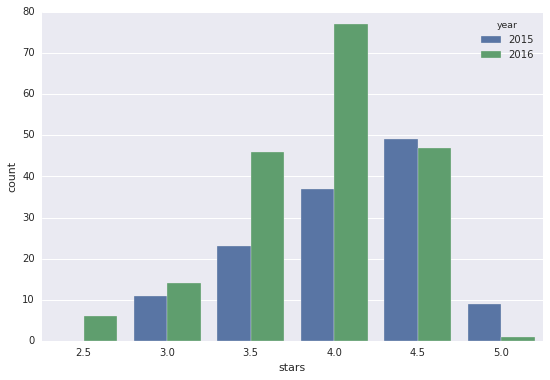

In [25]:
import seaborn as sns
sns.countplot(x='stars',hue = 'year', data=concat, order=['2.5','3.0','3.5','4.0','4.5','5.0'],
              hue_order = ['2015','2016'])

## Conclusion


Our analysis showed that there's clearly a difference between Fandango's ratings for movies in 2015 and movies in 2016.